<a href="https://colab.research.google.com/github/mirrorball108/genre_classification/blob/main/genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
 99% 1.21G/1.21G [00:06<00:00, 233MB/s]
100% 1.21G/1.21G [00:06<00:00, 211MB/s]


In [3]:
import zipfile

with zipfile.ZipFile('/content/gtzan-dataset-music-genre-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
import pandas as pd
import os
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
audio_dataset_path='/content/Data/genres_original'
metadata=pd.read_csv('/content/Data/features_30_sec.csv')
metadata.sample(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
954,rock.00054.wav,661794,0.346661,0.086545,0.065484,0.000636,2632.220428,9.589206e+05,2550.096822,200989.870302,...,66.476738,-3.888535,38.896236,1.381452,56.495228,-2.003372,80.230522,-4.719515,48.169331,rock
180,classical.00080.wav,661794,0.437906,0.094107,0.005276,0.000030,971.777391,9.410318e+04,1614.749295,207167.296701,...,14.534595,4.332311,13.931521,3.357461,15.662603,2.624509,20.659353,1.659115,23.679209,classical
756,pop.00056.wav,661504,0.472920,0.097678,0.250078,0.015148,3682.386205,2.140228e+06,3222.448442,234208.858861,...,92.627243,3.526669,66.088524,1.444305,71.471207,0.481101,63.351250,-1.791959,93.538338,pop
149,classical.00049.wav,661408,0.311587,0.081375,0.123812,0.004038,2224.870164,3.381116e+05,2274.309912,102208.032813,...,34.421700,-4.816374,39.301018,-2.217761,32.562088,-3.808980,44.229267,0.233790,52.587013,classical
584,jazz.00084.wav,661794,0.392989,0.086678,0.051700,0.000464,2875.081678,3.361023e+05,2802.921671,120486.449469,...,47.746010,7.935544,49.760464,4.533977,49.967999,-1.599381,62.184299,3.734071,72.129234,jazz
441,hiphop.00041.wav,675808,0.425397,0.091546,0.186940,0.011430,2702.621720,7.024275e+05,2666.607228,153343.406488,...,62.035843,-5.015092,58.658913,-3.964157,71.954132,-5.721849,92.270866,-0.039238,79.625717,hiphop
387,disco.00087.wav,661504,0.384720,0.089510,0.119300,0.000856,2139.639539,3.328598e+05,2190.239650,98223.214333,...,62.461609,-4.320702,55.751511,3.170763,66.085495,-3.749718,73.322395,3.564952,69.392036,disco
434,hiphop.00034.wav,667700,0.471089,0.081754,0.227574,0.002799,3191.782962,2.579806e+05,2735.385822,52359.564439,...,39.442745,-2.901063,41.135590,2.777668,43.202515,-1.798684,51.091576,-0.278357,55.586819,hiphop
228,country.00028.wav,661794,0.318227,0.088520,0.094112,0.000953,1474.196472,1.214053e+05,1885.994958,77614.664761,...,52.194702,-7.162923,46.358559,-1.423772,47.303959,0.162018,43.683628,-4.106783,38.266785,country
786,pop.00086.wav,661504,0.387451,0.078213,0.132542,0.001493,3593.788286,5.215268e+05,3171.031491,63534.430332,...,52.646637,3.031741,60.295341,2.632356,68.133263,2.075720,64.152771,1.358187,57.082161,pop


In [6]:
metadata.shape

(1000, 60)

In [7]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

## **Feature Extraction Function**
working with MFCCs

In [8]:
def features_extractor(file):
  audio,sample_rate=librosa.load(file,res_type='kaiser_fast')
  mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

  return mfccs_scaled_features

In [11]:
metadata.drop(labels=552,axis=0,inplace=True)

In [12]:
metadata.shape

(999, 60)

In [13]:
os.path.abspath(audio_dataset_path)

'/content/Data/genres_original'

In [14]:
from typing_extensions import final
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
  try:
    final_class_labels=row['label']
    file_name=os.path.join(os.path.abspath(audio_dataset_path),final_class_labels+'/',str(row['filename']))
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

  except Exception as e:
    print(f"Error:{e}")
    continue


553it [00:43,  9.31it/s]<ipython-input-8-a12220d05995>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sample_rate=librosa.load(file,res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
554it [00:44,  5.37it/s]

Error:


999it [01:18, 12.70it/s]


In [15]:
#converting extracted data in a pandas data frame

extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.sample(5)

,feature,class
962,"[-118.8025, 104.436676, -29.188751, 42.102615,...",rock
583,"[-131.90504, 61.607956, -12.67634, 35.07376, -...",jazz
7,"[-179.3723, 136.44833, -26.662588, 39.96545, 5...",blues
677,"[-74.911835, 79.12138, -40.891678, 54.720924, ...",metal
462,"[-144.11632, 73.39044, 4.657706, 24.01729, 12....",hiphop


In [16]:
extracted_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  998 non-null    object
 1   class    998 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [17]:
extracted_features_df['class'].value_counts()

,count
class,
blues,100
classical,100
country,100
disco,100
hiphop,100
metal,100
pop,100
reggae,100
rock,100


In [18]:
#splitting the dataset into independent and dependent data sets

x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [19]:
x.shape

(998, 40)

In [20]:
y.shape

(998,)

# Encoding y

In [21]:
import tensorflow
from tensorflow.keras.utils import to_categorical


In [22]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y=to_categorical(encode.fit_transform(y))

In [24]:
y.shape

(998, 10)

In [25]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

#Train test split

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
x_train.shape

(798, 40)

In [28]:
x_train

array([[-1.04723763e+02,  8.77537155e+01, -3.32488594e+01, ...,
        -2.38248801e+00, -1.36347139e+00, -7.22123563e-01],
       [-2.59909851e+02,  1.23193169e+02, -6.39508581e+00, ...,
        -6.73697710e+00, -3.90829515e+00,  3.18117642e+00],
       [-1.15755066e+02,  6.70791245e+01,  1.88346851e+00, ...,
        -3.43661404e+00, -1.73870683e+00, -4.68738191e-02],
       ...,
       [-1.25020428e+01,  9.13173676e+01, -2.30759563e+01, ...,
        -4.04763937e+00, -1.77685583e+00, -1.75431299e+00],
       [-2.37930984e+01,  8.29835587e+01,  2.32049227e+00, ...,
         1.40550292e+00,  4.16220367e-01, -3.45980115e-02],
       [-9.63196945e+01,  9.09497147e+01, -3.22195396e+01, ...,
        -2.41483903e+00, -1.62698299e-01, -1.84749973e+00]], dtype=float32)

In [29]:
x_test.shape

(200, 40)

In [30]:
import tensorflow as tf

print(tf.__version__)

2.17.0


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
#no. of classes

num_labels=y.shape[1]

In [33]:
model=Sequential()
model.add(Dense(1024,input_shape=(40,),activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0,3))

#final layer
model.add(Dense(num_labels,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          41,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741,674 (2.83 MB)

 Trainable params: 741,674 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
import time
t=time.localtime()
current_time=time.strftime("%H:%M:%S",t)

In [38]:
#training

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size=32

checkpointer=ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.keras', verbose=1,save_best_only=True)
start=datetime.now()

history=model.fit(x_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(x_test,y_test),callbacks=[checkpointer],verbose=1)
duration=datetime.now() - start
print("Training completed in time: ",duration)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1221 - loss: 3.4532
Epoch 1: val_loss improved from inf to 2.06844, saving model to saved_models/audio_classification_09:03:18.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.1245 - loss: 3.4248 - val_accuracy: 0.2400 - val_loss: 2.0684
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2954 - loss: 1.9509
Epoch 2: val_loss improved from 2.06844 to 1.77068, saving model to saved_models/audio_classification_09:03:18.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2957 - loss: 1.9496 - val_accuracy: 0.3550 - val_loss: 1.7707
Epoch 3/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3860 - loss: 1.6699
Epoch 3: val_loss did not improve from 1.77068
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3855 - loss: 1.6753 - val_accuracy: 0.3700 - val_loss: 1.8488
Epoch 4/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4444 - loss: 1.5811
Epoch 4: val_loss improved from

In [39]:
model.evaluate(x_test,y_test,verbose=0)


[4.040362358093262, 0.6100000143051147]

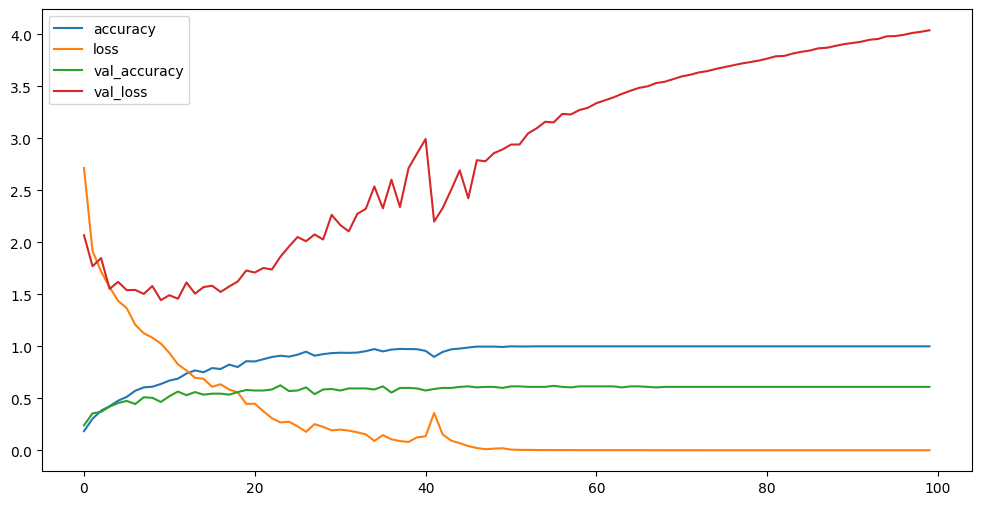

In [40]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [43]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [44]:
predicted_classes

array([0, 7, 0, 7, 6, 7, 5, 2, 8, 2, 6, 4, 1, 1, 5, 7, 4, 5, 9, 0, 4, 5,
       8, 0, 1, 7, 5, 2, 0, 6, 7, 4, 0, 4, 6, 6, 9, 5, 2, 7, 6, 9, 7, 3,
       0, 8, 4, 3, 3, 6, 5, 8, 6, 5, 2, 2, 3, 2, 3, 6, 6, 8, 0, 9, 4, 2,
       1, 4, 9, 1, 6, 3, 9, 9, 4, 3, 5, 4, 6, 0, 8, 6, 8, 7, 2, 5, 8, 8,
       4, 2, 4, 0, 9, 4, 6, 7, 7, 5, 2, 0, 5, 2, 4, 2, 1, 4, 7, 8, 1, 6,
       0, 3, 8, 9, 6, 2, 4, 6, 3, 1, 4, 8, 5, 9, 0, 9, 1, 2, 5, 7, 8, 9,
       5, 4, 1, 2, 8, 4, 3, 2, 9, 3, 0, 0, 7, 0, 4, 3, 4, 9, 6, 8, 3, 8,
       8, 6, 4, 8, 4, 2, 9, 5, 6, 4, 7, 1, 7, 2, 7, 5, 4, 6, 1, 7, 3, 1,
       4, 7, 2, 3, 9, 3, 6, 5, 8, 8, 0, 6, 9, 7, 9, 6, 1, 2, 8, 9, 6, 2,
       2, 1])

In [45]:
predicted_classes.shape

(200,)

In [46]:
filename='/content/Data/genres_original/hiphop/hiphop.00001.wav'
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_feature=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_features_scaled=np.mean(mfccs_feature.T,axis=0)

print(mfccs_features_scaled)

[-8.1234909e+01  4.9593636e+01 -1.4547480e+01  5.7964966e+01
  6.8197689e+00  2.7149471e+01 -6.8581381e+00  3.1304558e+01
 -1.0085702e+01  2.0306627e+01 -2.5411096e+00  1.2749884e+01
  3.9834008e+00  1.3237081e+01 -2.3675616e+00  1.2267019e+01
 -7.0323944e+00  4.7449803e+00  1.8698170e+00  2.8270701e-02
 -3.9526231e+00  4.0926576e+00 -5.4873490e+00 -2.7178168e+00
  1.3222202e+00  2.6618719e+00  5.8509889e+00  2.0438573e+00
  2.4336455e+00 -1.3747553e+00  8.0556077e-01 -3.2767189e+00
 -5.2887816e+00 -7.2635422e+00 -5.5690284e+00 -6.9920001e+00
 -5.5450025e+00 -5.8104434e+00 -1.5413762e+00 -3.3008816e+00]


In [47]:
mfccs_features_scaled=mfccs_features_scaled.reshape(1,-1)
print(mfccs_features_scaled.shape)

(1, 40)


In [48]:
predictions = model.predict(mfccs_features_scaled)
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [49]:
print(predicted_classes)

[4]


In [50]:
prediction_class=encode.inverse_transform(predicted_classes)
print(prediction_class)

['hiphop']
